# Trabalhando com Gráficos



## Importanto a Base de Dados

In [6]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 8))

In [7]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/aluguel_residencial.csv', sep = ';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [8]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados_bairro = dados[selecao]

In [9]:
dados_bairro

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
12,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,NaN
13,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0
...,...,...,...,...,...,...,...,...,...
22570,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
22571,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0
22572,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0
22574,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0


## Distribuição de Frequência

In [10]:
# Frequência de Quartos
# 1 e 2
# 3 e 4
# 5 e 6
# 7 ou mais
classes = [0, 2, 4, 6, 15]  # Limites de cada classe

In [11]:
quartos = pd.cut(dados.Quartos, classes)
quartos

0        (0.0, 2.0]
1        (0.0, 2.0]
2        (0.0, 2.0]
3        (0.0, 2.0]
4        (2.0, 4.0]
            ...    
22575    (0.0, 2.0]
22576           NaN
22577    (2.0, 4.0]
22578    (0.0, 2.0]
22579    (0.0, 2.0]
Name: Quartos, Length: 22580, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 4] < (4, 6] < (6, 15]]

In [12]:
pd.value_counts(quartos)

(0, 2]     11814
(2, 4]      9860
(4, 6]       689
(6, 15]       51
Name: Quartos, dtype: int64

In [13]:
labels = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 quartos ou mais']
quartos = pd.cut(dados.Quartos, classes, labels = labels)
pd.value_counts(quartos)

1 e 2 quartos        11814
3 e 4 quartos         9860
5 e 6 quartos          689
7 quartos ou mais       51
Name: Quartos, dtype: int64

## Boxplot

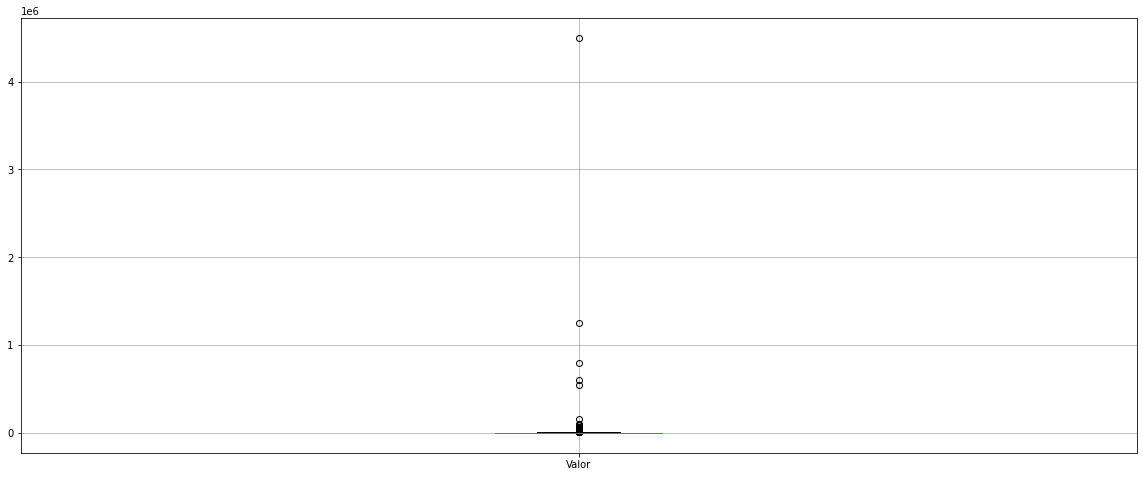

In [14]:
dados.boxplot(['Valor'])

In [15]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
7894,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0
11013,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,NaN
13099,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0
14325,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
16056,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,NaN


In [16]:
valor = dados['Valor']

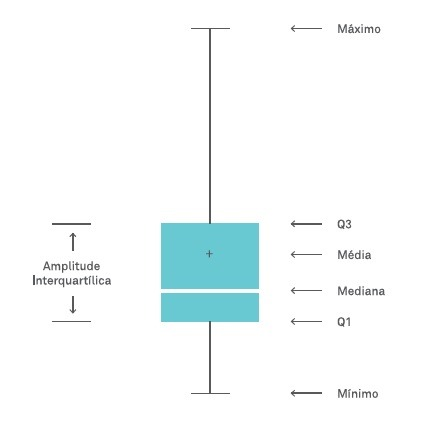

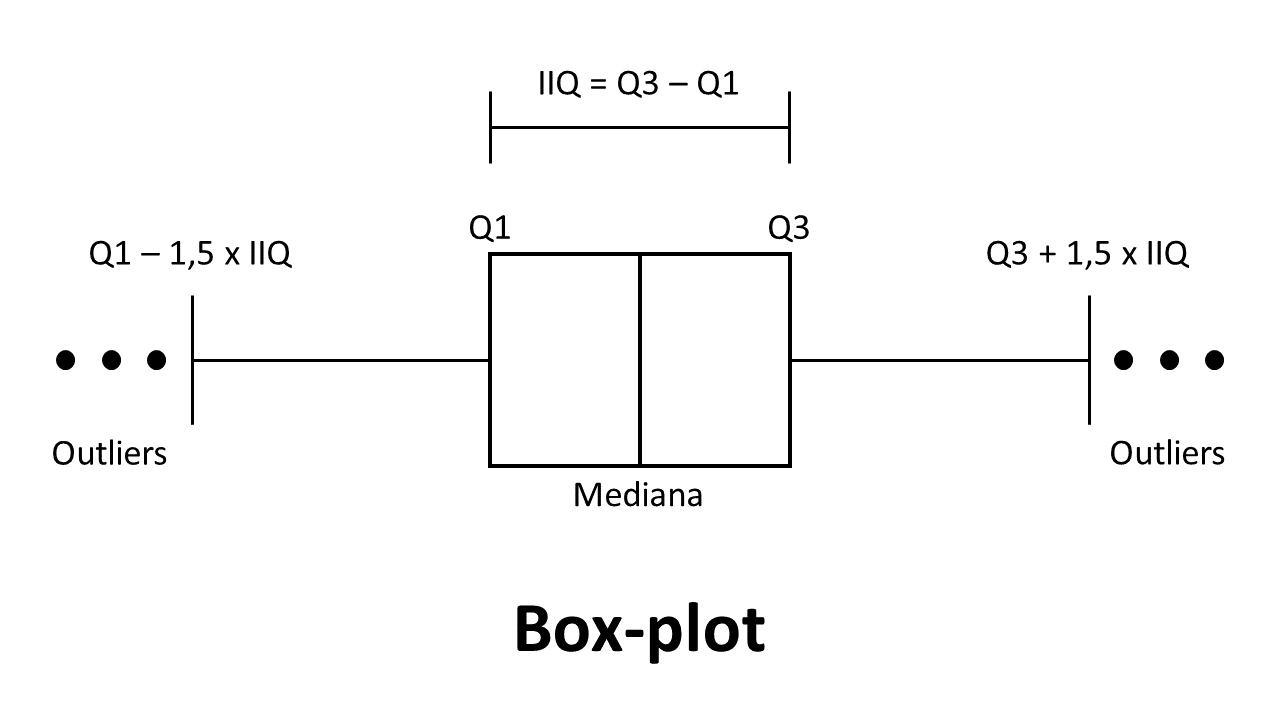

In [17]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [18]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

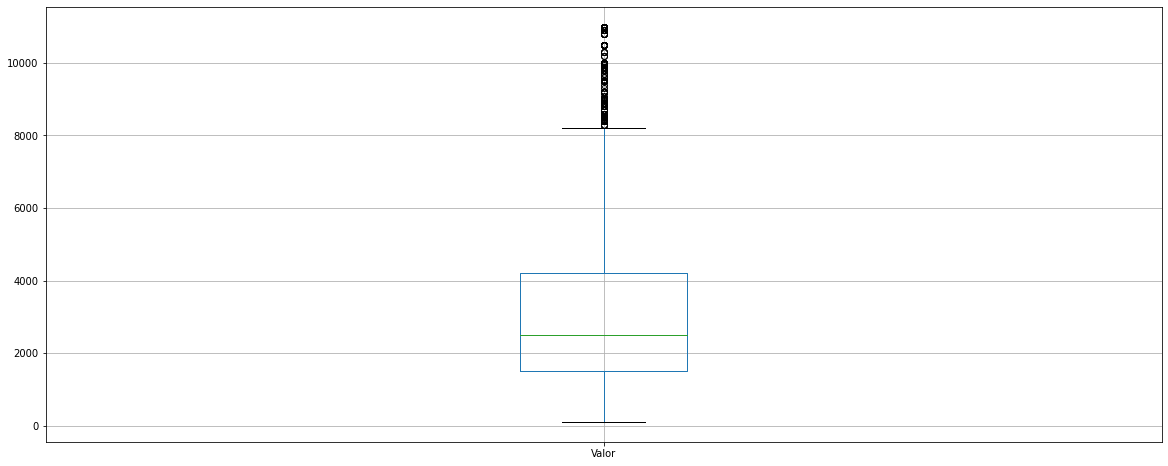

In [19]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9af0c542d0>]],
      dtype=object)

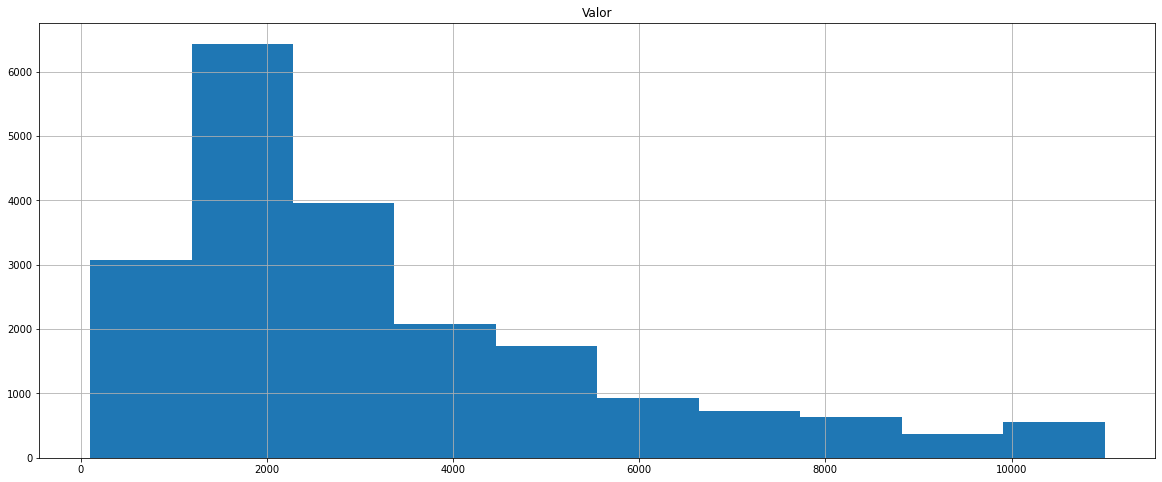

In [20]:
dados_new.hist(['Valor'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


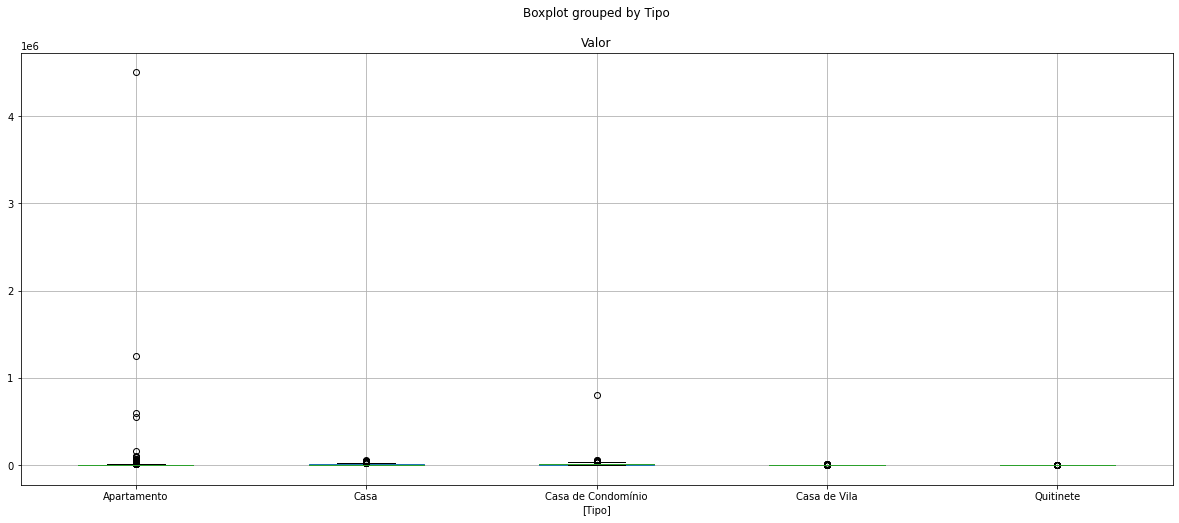

In [21]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [22]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [23]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [24]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [25]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
  eh_tipo = dados['Tipo'] == tipo
  eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
  selecao = eh_tipo & eh_dentro_limite
  dados_selecao = dados[selecao]
  dados_new = pd.concat([dados_new, dados_selecao])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


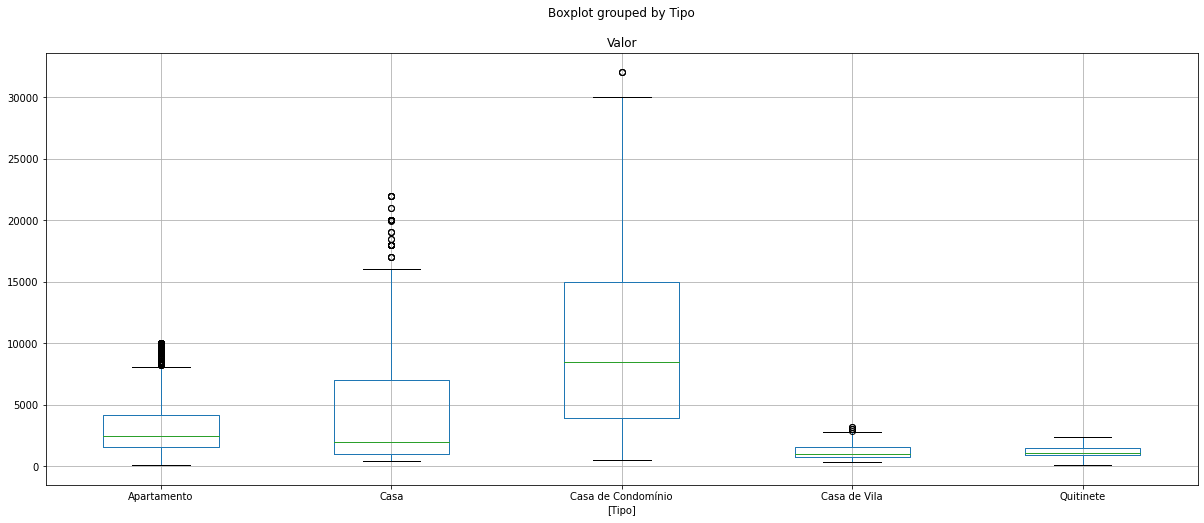

In [26]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [27]:
#dados_new.to_csv('/content/drive/MyDrive/Colab Notebooks/Dados/extras/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)

# Gráficos Conjuntos

In [28]:
# Criando figura area
area = plt.figure()

<Figure size 1440x576 with 0 Axes>

In [29]:
g1 = area.add_subplot(2, 2, 1)  # Duas Linhas e Duas Colunas, este gráfico será o primeiro
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [30]:
g1.scatter(dados_new.Valor, dados_new.Area)
g1.set_title('Valor X Área')

g2.hist(dados_new.Valor)
g2.set_title('Histograma')

dados_g3 = dados_new.Valor.sample(100)    # Amostra de 100 dados aleatórios
dados_g3.index = range(dados_g3.shape[0])   # Conserta o index
g3.plot(dados_g3)
g3.set_title('Amostra Valor')

grupo = dados_new.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

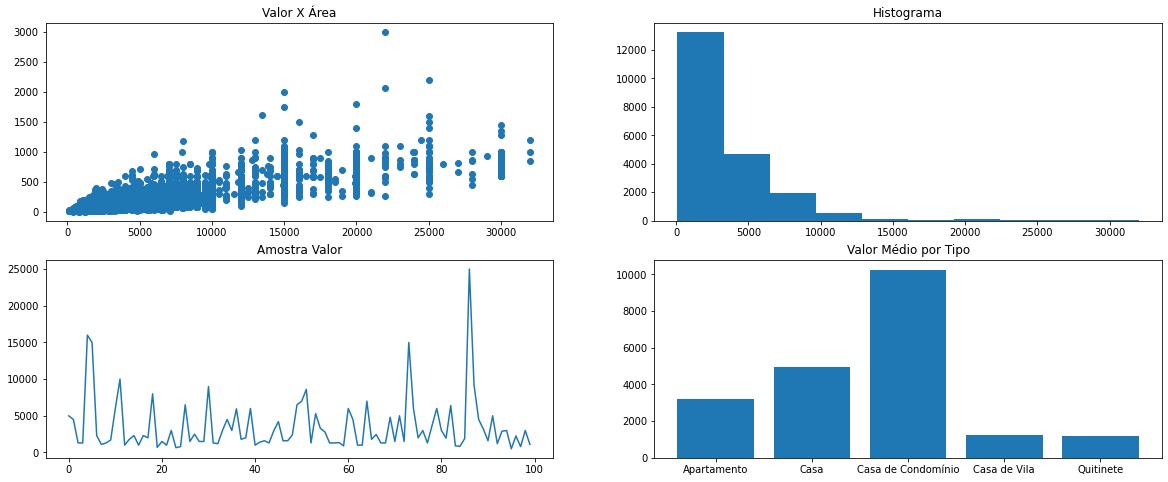

In [31]:
area

In [32]:
# area.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')

In [33]:
casa = ['Casa', 'Casa de Condomínio', 'Casa de Vila']

In [34]:
dados['Tipo Agregado'] = dados['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')

In [35]:
area = plt.figure()

<Figure size 1440x576 with 0 Axes>

In [36]:
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)

In [37]:
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')

grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

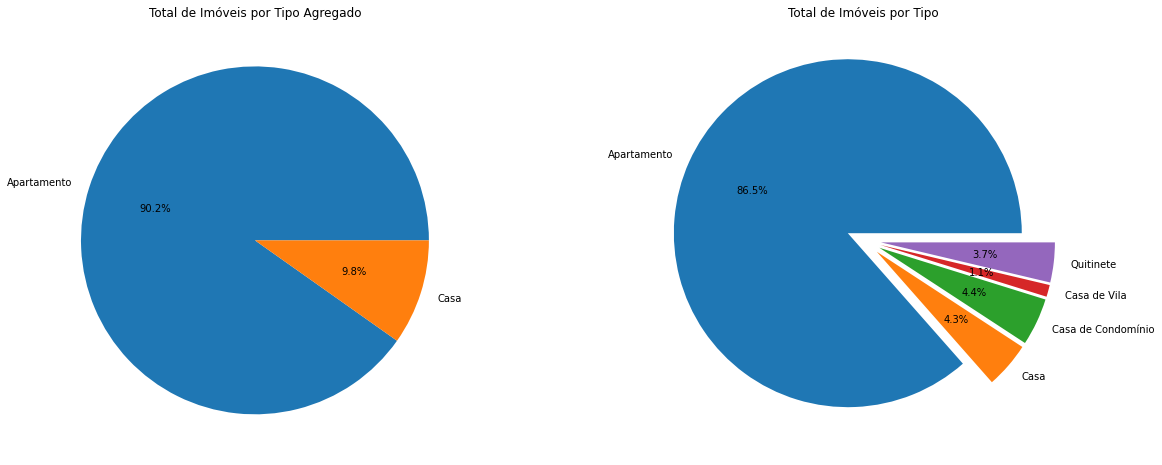

In [38]:
area

# Análise de Filmes

In [39]:
import seaborn as sns

In [41]:
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/movies/tmdb_5000_movies.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [42]:
movies.original_language.unique()   # Categoria Nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [43]:
contagem_de_lingua = movies["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


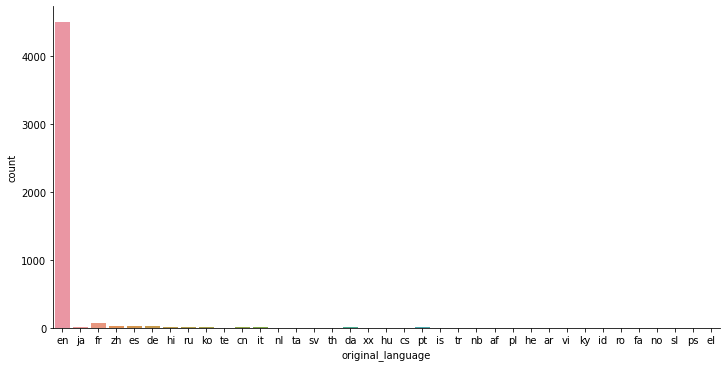

In [46]:
sns.catplot(x = "original_language", kind="count", data = movies, aspect=2)

In [47]:
total_ingles = movies.query("original_language == 'en'").original_language.value_counts()
total_ingles

en    4505
Name: original_language, dtype: int64

In [55]:
total_ingles.values

array([4505])

In [65]:
outros = movies.query("original_language != 'en'")
total_outros = outros.original_language.value_counts()
total_outros

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
cs     2
ar     2
id     2
ta     2
ro     2
pl     1
te     1
ps     1
vi     1
hu     1
xx     1
no     1
nb     1
is     1
sl     1
ky     1
el     1
tr     1
af     1
Name: original_language, dtype: int64

In [64]:
total_outros_soma = total_outros.sum()
total_outros_soma

298

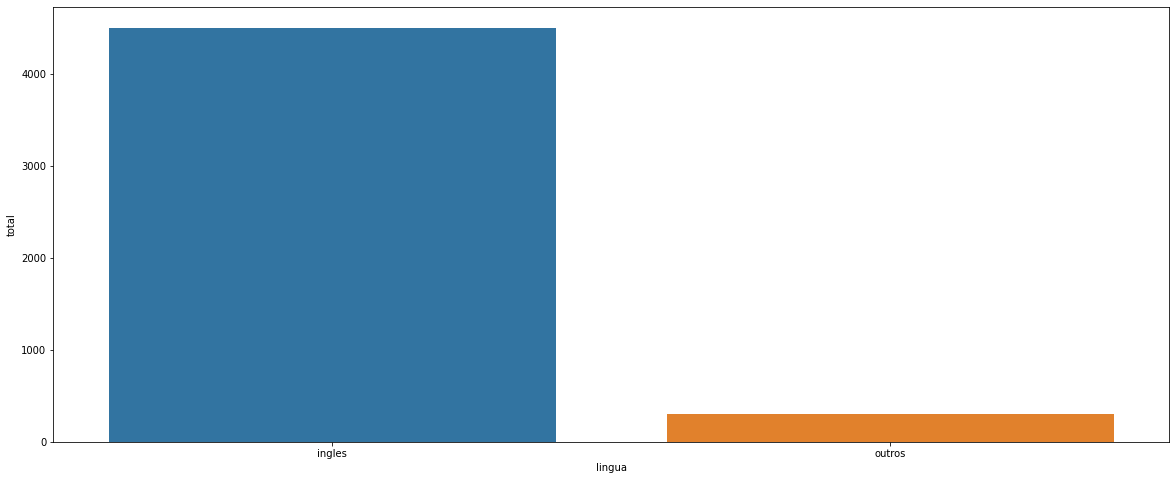

In [58]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_ingles.values[0], total_outros_soma]
}

dados = pd.DataFrame(dados)
sns.barplot(x='lingua', y='total', data=dados)

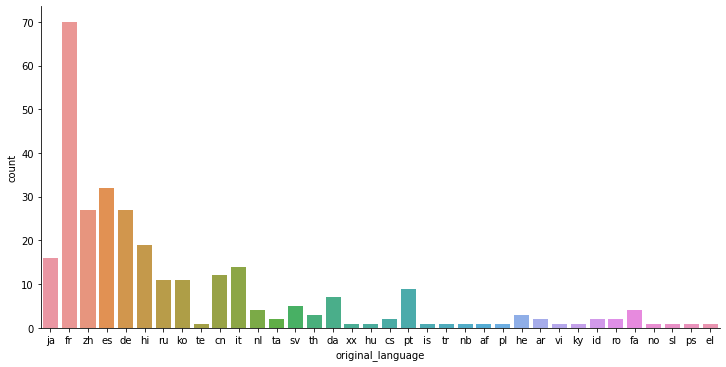

In [67]:
sns.catplot(x = "original_language", kind="count", data = outros, aspect = 2)

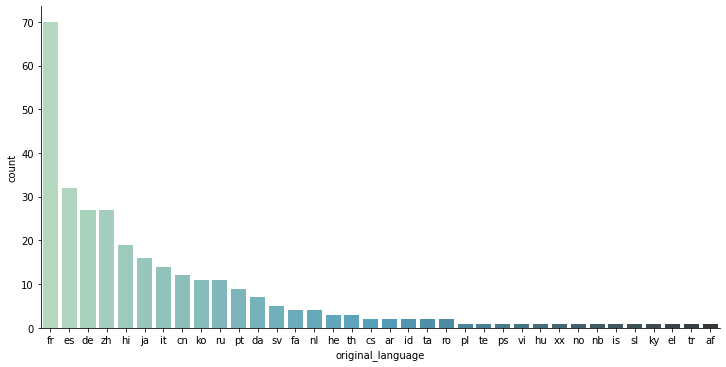

In [69]:
sns.catplot(x = "original_language", kind="count", data = outros, aspect = 2, palette = 'GnBu_d', order = total_outros.index)